Veena Ghorakavi

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
#Please comment out this line of code if unnecessary
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving concrete.csv to concrete.csv


In [2]:
Data = pd.read_csv("concrete.csv")
Data.head(10) #several missing values!

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
Data.shape

(1030, 9)

In [4]:
Data.info

<bound method DataFrame.info of       cement   slag    ash  water  ...  coarseagg  fineagg  age  strength
0      141.3  212.0    0.0  203.5  ...      971.8    748.5   28     29.89
1      168.9   42.2  124.3  158.3  ...     1080.8    796.2   14     23.51
2      250.0    0.0   95.7  187.4  ...      956.9    861.2   28     29.22
3      266.0  114.0    0.0  228.0  ...      932.0    670.0   28     45.85
4      154.8  183.4    0.0  193.3  ...     1047.4    696.7   28     18.29
...      ...    ...    ...    ...  ...        ...      ...  ...       ...
1025   135.0    0.0  166.0  180.0  ...      961.0    805.0   28     13.29
1026   531.3    0.0    0.0  141.8  ...      852.1    893.7    3     41.30
1027   276.4  116.0   90.3  179.6  ...      870.1    768.3   28     44.28
1028   342.0   38.0    0.0  228.0  ...      932.0    670.0  270     55.06
1029   540.0    0.0    0.0  173.0  ...     1125.0    613.0    7     52.61

[1030 rows x 9 columns]>

In [5]:
Data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


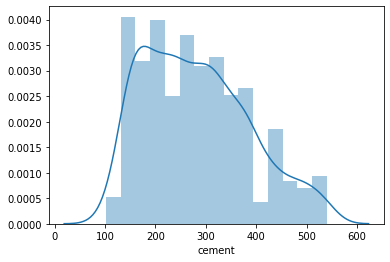

In [6]:
sns.distplot(Data['cement'])

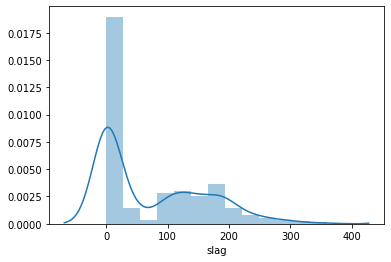

In [7]:
sns.distplot(Data['slag'])

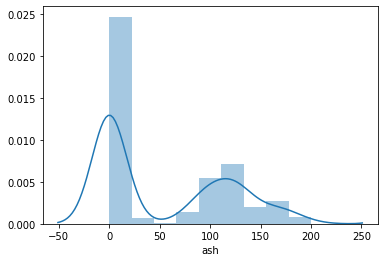

In [8]:
sns.distplot(Data['ash'])